In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.46M/6.46M [00:02<00:00, 3.21MB/s]


In [4]:
# Visit the website
url ='https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
html=browser.html

In [5]:
# Create a Beautiful Soup Object
soup = soup(html,'html.parser')
table = soup.find('table')
#storing all rows into one variable
# results = soup.find('table')
# results

In [6]:
# Create an empty list
data_list=[]
# Loop through the scraped data to create a list of rows
for data in table.find_all('tbody'):
    rows = data.find_all('tr', class_='data-row')
    for row in rows:
        try:
            dict={}
            dict['id']=row.find_all('td')[0].text
            dict['terrestrial_date']=row.find_all('td')[1].text
            dict['sol']=row.find_all('td')[2].text
            dict['ls']=row.find_all('td')[3].text
            dict['month']=row.find_all('td')[4].text
            dict['min_temp']=row.find_all('td')[5].text
            dict['pressure']=row.find_all('td')[6].text
            print(dict)
            data_list.append(dict)
        except Exception as e:
            print(e)


{'id': '2', 'terrestrial_date': '2012-08-16', 'sol': '10', 'ls': '155', 'month': '6', 'min_temp': '-75.0', 'pressure': '739.0'}
{'id': '13', 'terrestrial_date': '2012-08-17', 'sol': '11', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '740.0'}
{'id': '24', 'terrestrial_date': '2012-08-18', 'sol': '12', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '741.0'}
{'id': '35', 'terrestrial_date': '2012-08-19', 'sol': '13', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '732.0'}
{'id': '46', 'terrestrial_date': '2012-08-20', 'sol': '14', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '740.0'}
{'id': '57', 'terrestrial_date': '2012-08-21', 'sol': '15', 'ls': '158', 'month': '6', 'min_temp': '-78.0', 'pressure': '740.0'}
{'id': '68', 'terrestrial_date': '2012-08-22', 'sol': '16', 'ls': '158', 'month': '6', 'min_temp': '-77.0', 'pressure': '740.0'}
{'id': '79', 'terrestrial_date': '2012-08-23', 'sol': '17', 'ls': '159', 'month': '6', 'min_temp':

{'id': '647', 'terrestrial_date': '2014-07-30', 'sol': '704', 'ls': '169', 'month': '6', 'min_temp': '-75.0', 'pressure': '747.0'}
{'id': '648', 'terrestrial_date': '2014-07-31', 'sol': '705', 'ls': '170', 'month': '6', 'min_temp': '-76.0', 'pressure': '746.0'}
{'id': '650', 'terrestrial_date': '2014-08-01', 'sol': '706', 'ls': '170', 'month': '6', 'min_temp': '-76.0', 'pressure': '748.0'}
{'id': '651', 'terrestrial_date': '2014-08-02', 'sol': '707', 'ls': '171', 'month': '6', 'min_temp': '-76.0', 'pressure': '749.0'}
{'id': '649', 'terrestrial_date': '2014-08-03', 'sol': '708', 'ls': '171', 'month': '6', 'min_temp': '-76.0', 'pressure': '749.0'}
{'id': '652', 'terrestrial_date': '2014-08-04', 'sol': '709', 'ls': '172', 'month': '6', 'min_temp': '-73.0', 'pressure': '750.0'}
{'id': '653', 'terrestrial_date': '2014-08-05', 'sol': '710', 'ls': '172', 'month': '6', 'min_temp': '-77.0', 'pressure': '751.0'}
{'id': '654', 'terrestrial_date': '2014-08-06', 'sol': '711', 'ls': '173', 'month':

{'id': '1439', 'terrestrial_date': '2016-11-14', 'sol': '1520', 'ls': '261', 'month': '9', 'min_temp': '-73.0', 'pressure': '905.0'}
{'id': '1441', 'terrestrial_date': '2016-11-15', 'sol': '1521', 'ls': '261', 'month': '9', 'min_temp': '-71.0', 'pressure': '905.0'}
{'id': '1442', 'terrestrial_date': '2016-11-16', 'sol': '1522', 'ls': '262', 'month': '9', 'min_temp': '-71.0', 'pressure': '905.0'}
{'id': '1443', 'terrestrial_date': '2016-11-17', 'sol': '1523', 'ls': '263', 'month': '9', 'min_temp': '-77.0', 'pressure': '905.0'}
{'id': '1444', 'terrestrial_date': '2016-11-18', 'sol': '1524', 'ls': '263', 'month': '9', 'min_temp': '-76.0', 'pressure': '904.0'}
{'id': '1445', 'terrestrial_date': '2016-11-20', 'sol': '1525', 'ls': '264', 'month': '9', 'min_temp': '-74.0', 'pressure': '902.0'}
{'id': '1446', 'terrestrial_date': '2016-11-21', 'sol': '1526', 'ls': '265', 'month': '9', 'min_temp': '-72.0', 'pressure': '900.0'}
{'id': '1449', 'terrestrial_date': '2016-11-22', 'sol': '1527', 'ls':

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
data_df=pd.DataFrame(data_list)
# Confirm DataFrame was created successfully
data_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [8]:
# Using read_html function
tables = pd.read_html(url)
df = tables[0]

In [9]:
# Examine data type of each column
data_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
data_df['terrestrial_date']=pd.to_datetime(data_df['terrestrial_date'])
data_df['sol']=data_df['sol'].astype('int64')
data_df['ls']=data_df['ls'].astype('int64')
data_df['month']=data_df['month'].astype('int64')
data_df['min_temp']=data_df['min_temp'].astype('float64')
data_df['pressure']=data_df['pressure'].astype('float64')


In [11]:
# Confirm type changes were successful by examining data types again
data_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [12]:
# 1. How many months are there on Mars?
months = data_df['month'].value_counts().sort_index(ascending=True)
months

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [13]:
# 2. How many Martian days' worth of data are there?
days = data_df['sol'].count()
days

1867

In [14]:
# 3. What is the average low temperature by month?
avg_low_temp = data_df.groupby(['month']).mean()['min_temp']
avg_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

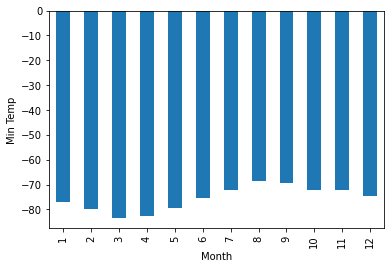

In [15]:
# Plot the average temperature by month
avg_low_temp.plot(x='month',y='min_temp',kind='bar')
plt.xlabel('Month')
plt.ylabel('Min Temp')
plt.show()

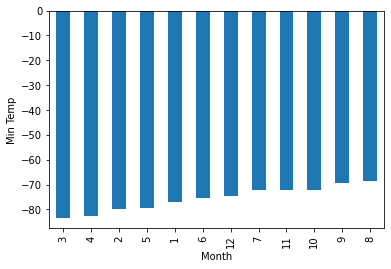

In [16]:
# Identify the coldest and hottest months in Curiosity's location
sorted_df = avg_low_temp.sort_values(ascending=True)
sorted_df.plot(x='month',y='min_temp',kind='bar')
plt.xlabel('Month')
plt.ylabel('Min Temp')
plt.show()


In [17]:
# 4. Average pressure by Martian month
avg_pressure = data_df.groupby(['month']).mean()['pressure']
sorted_pressure=avg_pressure.sort_values(ascending=True)

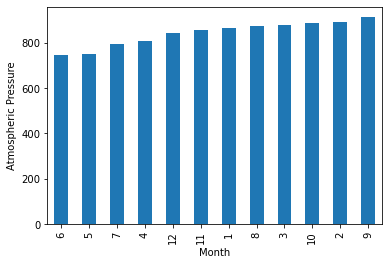

In [18]:
# Plot the average pressure by month
sorted_pressure.plot(x='month',y='pressure',kind='bar')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.show()


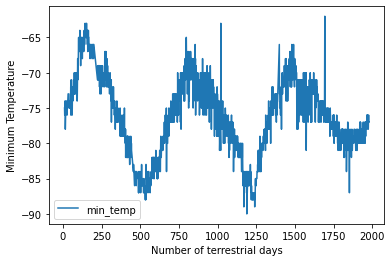

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?
data_df.plot(x='sol',y='min_temp',kind='line')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum Temperature')
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!

Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

In [20]:
# Write the data to a CSV
data_df.to_csv('Mars_Weather.csv')

In [21]:
browser.quit()